<a href="https://colab.research.google.com/github/rubanzasilva/tabular-playground/blob/main/tabularPlayground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [10]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
import seaborn as sns
from pathlib import Path
import PIL
import json
from pathlib import Path

In [ ]:
!pip install fastcore fastai --upgrade

In [2]:
from fastai.tabular.all import *

In [8]:
!git clone https://github.com/rubanzasilva/tabular-playground-dataset.git


Cloning into 'tabular-playground-dataset'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [1]:
!ls 

sample_data	       tabular-playground-dataset  train.csv
sample_submission.csv  test.csv


In [9]:
!unzip tabular-playground-dataset/tabular-playground-series-mar-2022.zip

Archive:  tabular-playground-dataset/tabular-playground-series-mar-2022.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
path = Path('')
path

Path('.')

In [4]:
df = pd.read_csv(path/'train.csv')
df.head()

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60


categorical-direction,x,y
continuos- row-id,time,congestion


In [5]:
dls = TabularDataLoaders.from_csv(path/'train.csv', path=path, y_names="congestion",
    cat_names = ['x','y','direction','time'],
    cont_names = ['row_id'],  
    procs = [Categorify, FillMissing, Normalize])

In [6]:
learn = tabular_learner(dls, metrics=mae)

SuggestedLRs(valley=0.0008317637839354575)

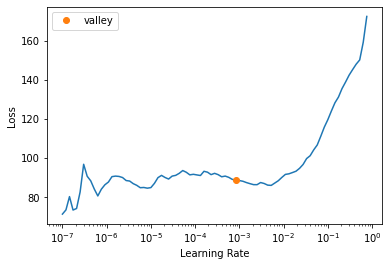

In [52]:
learn.lr_find()

In [8]:
learn.fit_one_cycle(10, 0.015848932787775993 ,wd=0.2)

epoch,train_loss,valid_loss,mae,time
0,128.416428,125.112617,8.257229,02:48
1,144.308334,139.971848,8.999866,02:42
2,157.055725,147.913879,9.321250,02:39
3,144.698318,141.572784,9.003997,02:39
4,140.232697,132.372391,8.625557,02:38
5,131.104233,130.583481,8.535410,02:38
6,125.559891,122.622887,8.261183,03:05
7,115.211403,111.503441,7.748755,02:39
8,103.726158,99.492729,7.222422,02:39
9,93.277893,92.156906,6.862475,02:40


In [53]:
learn.fit_one_cycle(20, 0.0008317637839354575 ,wd=0.2)

epoch,train_loss,valid_loss,mae,time
0,83.233780,94.682243,6.987897,02:35
1,95.448685,95.754112,7.065452,02:37
2,103.293602,100.431778,7.266311,02:32
3,103.675209,101.025650,7.309925,02:32
4,103.849792,101.900887,7.315485,02:31
5,103.401756,100.424171,7.219901,02:33
6,104.269012,100.859978,7.283652,02:33
7,103.984810,99.665421,7.223973,02:35
8,106.271172,98.497345,7.154048,02:38
9,100.905441,98.616211,7.194248,02:39


KeyboardInterrupt: ignored

In [54]:
learn.show_results()

epoch,train_loss,valid_loss,mae,time
0,83.233780,94.682243,6.987897,02:35
1,95.448685,95.754112,7.065452,02:37
2,103.293602,100.431778,7.266311,02:32
3,103.675209,101.025650,7.309925,02:32
4,103.849792,101.900887,7.315485,02:31
5,103.401756,100.424171,7.219901,02:33
6,104.269012,100.859978,7.283652,02:33
7,103.984810,99.665421,7.223973,02:35
8,106.271172,98.497345,7.154048,02:38
9,100.905441,98.616211,7.194248,02:39


,x,y,direction,time,row_id,congestion,congestion_pred
0,3.0,4.0,1.0,1878.0,-1.234111,26.0,36.465183
1,3.0,2.0,1.0,5709.0,-0.217887,71.0,73.940819
2,2.0,3.0,2.0,7043.0,0.135935,42.0,35.046349
3,3.0,1.0,1.0,4096.0,-0.645801,76.0,58.822411
4,1.0,3.0,1.0,10656.0,1.094308,46.0,46.398331
5,3.0,4.0,8.0,807.0,-1.518206,38.0,42.486156
6,3.0,2.0,7.0,2731.0,-1.007868,44.0,77.666672
7,1.0,2.0,8.0,12332.0,1.538914,52.0,46.638638
8,2.0,4.0,8.0,10601.0,1.079844,52.0,55.845760


Making predictions on test set test_dl method of the DataLoaders.

Learner.get_preds will give you the predictions

In [55]:
test_df = pd.read_csv(path/'test.csv')
test_df.head()

,row_id,time,x,y,direction
0,848835,1991-09-30 12:00:00,0,0,EB
1,848836,1991-09-30 12:00:00,0,0,NB
2,848837,1991-09-30 12:00:00,0,0,SB
3,848838,1991-09-30 12:00:00,0,1,EB
4,848839,1991-09-30 12:00:00,0,1,NB


In [56]:
test_dl = learn.dls.test_dl(test_df)
pred = learn.get_preds(dl=test_dl)
pred

(tensor([[49.4914],
         [40.5194],
         [46.5730],
         ...,
         [71.2112],
         [21.5904],
         [45.9148]]), None)

In [57]:
pred

(tensor([[49.4914],
         [40.5194],
         [46.5730],
         ...,
         [71.2112],
         [21.5904],
         [45.9148]]), None)

In [58]:
learn.show_results()

,x,y,direction,time,row_id,congestion,congestion_pred
0,3.0,1.0,1.0,3941.0,-0.686919,59.0,58.206127
1,3.0,1.0,2.0,9572.0,0.806879,66.0,69.853065
2,2.0,4.0,5.0,3662.0,-0.760945,59.0,52.841515
3,3.0,4.0,3.0,7430.0,0.238734,23.0,33.798409
4,3.0,1.0,8.0,8631.0,0.557258,68.0,63.972294
5,3.0,3.0,1.0,10894.0,1.157624,51.0,61.832024
6,2.0,4.0,5.0,12820.0,1.668493,43.0,46.578583
7,2.0,4.0,3.0,11579.0,1.339276,74.0,49.909996
8,1.0,2.0,1.0,10814.0,1.136206,22.0,34.663857


In [59]:
target_preds = pred[0]

test_df['congestion'] = target_preds

In [60]:
test_df.to_csv(path/'submission.csv', columns=['row_id','congestion'], index=False)

In [61]:
sub = pd.read_csv(path/'submission.csv')
sub.head()

,row_id,congestion
0,848835,49.491386
1,848836,40.519370
2,848837,46.572998
3,848838,27.282969
4,848839,71.845260


In [62]:
sample = pd.read_csv(path/'sample_submission.csv')
sample.head()

,row_id,congestion
0,848835,0.0
1,848836,0.0
2,848837,0.0
3,848838,0.0
4,848839,0.0


In [63]:
preds = learn.get_preds()
pred_tensors = preds[0]
actual_labels = preds[1].numpy()

In [64]:
pred_tensors, actual_labels

total_to_test = 20000
correct = 0
for i in range(total_to_test):
    if(pred_tensors[i][0] > 0.5 and actual_labels[i] == 0):
        correct = correct + 1

print(f"{correct}/{total_to_test} correct")

26/20000 correct


In [46]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rubanzasilva","key":"06af73caa77b7e0a4abaee81e3761f15"}'}

In [47]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [48]:
# This permissions change avoids a warning on Kaggle tool startup.
#Change the permissions of the file.
!chmod 600 ~/.kaggle/kaggle.json

In [49]:
!ls

kaggle.json  sample_data	    submission.csv		test.csv
models	     sample_submission.csv  tabular-playground-dataset	train.csv


In [50]:
!kaggle competitions submit -c tabular-playground-series-mar-2022 -f submission.csv -m "Message"

100% 37.8k/37.8k [00:01<00:00, 29.9kB/s]
Successfully submitted to Tabular Playground Series - Mar 2022

In [ ]:
preds, targs = learn.get_preds()
print(mean_absolute_error(preds, targs))

learn.show_results()

submitting